In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

sns.set_theme(style="whitegrid")

# Load Data

In [25]:
X_train = pd.read_csv("../../data/preprocessed/X_train.csv", index_col=0)
X_test = pd.read_csv("../../data/preprocessed/X_test.csv", index_col=0)
y_train = pd.read_csv("../../data/preprocessed/y_train.csv", index_col=0)

X_train.head(5)

,dataset,model_DTC,model_KNC,model_LGBMC,model_LR,model_SVC,tuning_full,tuning_model,tuning_no,scoring_ACC,...,enc_dim_40,enc_dim_41,enc_dim_42,enc_dim_43,enc_dim_44,enc_dim_45,enc_dim_46,enc_dim_47,enc_dim_48,enc_dim_49
0,1169,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,-0.018899,-0.075766,-0.04139,-0.067163,0.152373,0.054675,-0.035989,-0.195375,-0.048616,0.10147
27,42178,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,-0.018899,-0.075766,-0.04139,-0.067163,0.152373,0.054675,-0.035989,-0.195375,-0.048616,0.10147
59,51,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,-0.018899,-0.075766,-0.04139,-0.067163,0.152373,0.054675,-0.035989,-0.195375,-0.048616,0.10147
91,1511,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,-0.018899,-0.075766,-0.04139,-0.067163,0.152373,0.054675,-0.035989,-0.195375,-0.048616,0.10147
123,1511,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,-0.018899,-0.075766,-0.04139,-0.067163,0.152373,0.054675,-0.035989,-0.195375,-0.048616,0.10147


In [26]:
X_train["dataset"] = X_train["dataset"].astype("category")
X_train = pd.get_dummies(X_train)
X_train.head(5)

,model_DTC,model_KNC,model_LGBMC,model_LR,model_SVC,tuning_full,tuning_model,tuning_no,scoring_ACC,scoring_AUC,...,dataset_42738,dataset_42750,dataset_43098,dataset_43607,dataset_43890,dataset_43892,dataset_43896,dataset_43897,dataset_43900,dataset_43922
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
27,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
59,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
91,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
123,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
N_COMPONENTS = 10

pca = PCA(n_components=N_COMPONENTS)
X_train_transformed = pca.fit_transform(X_train)
X_train_transformed = pd.DataFrame(X_train_transformed, columns=[f"PC{i}" for i in range(N_COMPONENTS)])
X_train_transformed.head(5)

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-0.659537,0.064306,0.864444,-0.636282,-0.091883,0.790749,-0.110913,0.609535,0.124398,-0.363727
1,-0.653348,0.067363,0.862095,-0.635466,-0.100769,0.792475,-0.108866,0.609330,0.140850,-0.365031
2,0.832477,0.608657,-0.452398,0.193253,-0.052537,0.040072,-0.140985,0.611942,0.794258,-0.365049
3,-0.369022,-0.099552,0.786993,0.638729,-0.256140,0.988499,-0.130798,0.596683,-0.391939,-0.356625
4,-0.728545,0.859928,-0.309216,-0.275745,0.786055,-0.246737,-0.124471,0.615427,0.139470,-0.360986


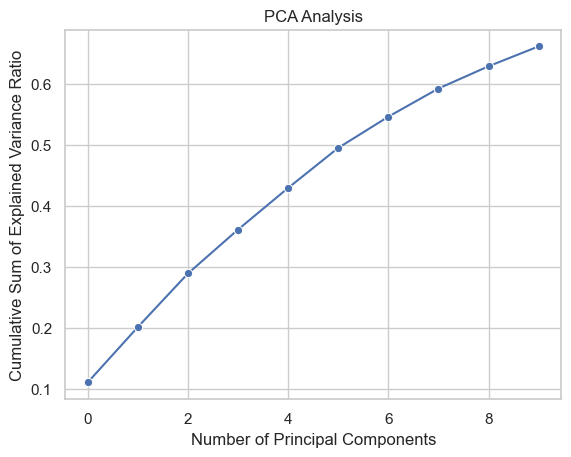

In [28]:
sns.lineplot(x=np.arange(0, N_COMPONENTS), y=pca.explained_variance_ratio_.cumsum(), marker="o")
plt.title("PCA Analysis")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Sum of Explained Variance Ratio")
plt.show()

In [29]:
N_CLUSTERS = 6

# Cluster PCA results
kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42)
kmeans.fit_transform(X_train_transformed)
X_train_transformed["cluster"] = kmeans.labels_
X_train_transformed.head(5)

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,cluster
0,-0.659537,0.064306,0.864444,-0.636282,-0.091883,0.790749,-0.110913,0.609535,0.124398,-0.363727,1
1,-0.653348,0.067363,0.862095,-0.635466,-0.100769,0.792475,-0.108866,0.609330,0.140850,-0.365031,1
2,0.832477,0.608657,-0.452398,0.193253,-0.052537,0.040072,-0.140985,0.611942,0.794258,-0.365049,5
3,-0.369022,-0.099552,0.786993,0.638729,-0.256140,0.988499,-0.130798,0.596683,-0.391939,-0.356625,2
4,-0.728545,0.859928,-0.309216,-0.275745,0.786055,-0.246737,-0.124471,0.615427,0.139470,-0.360986,1


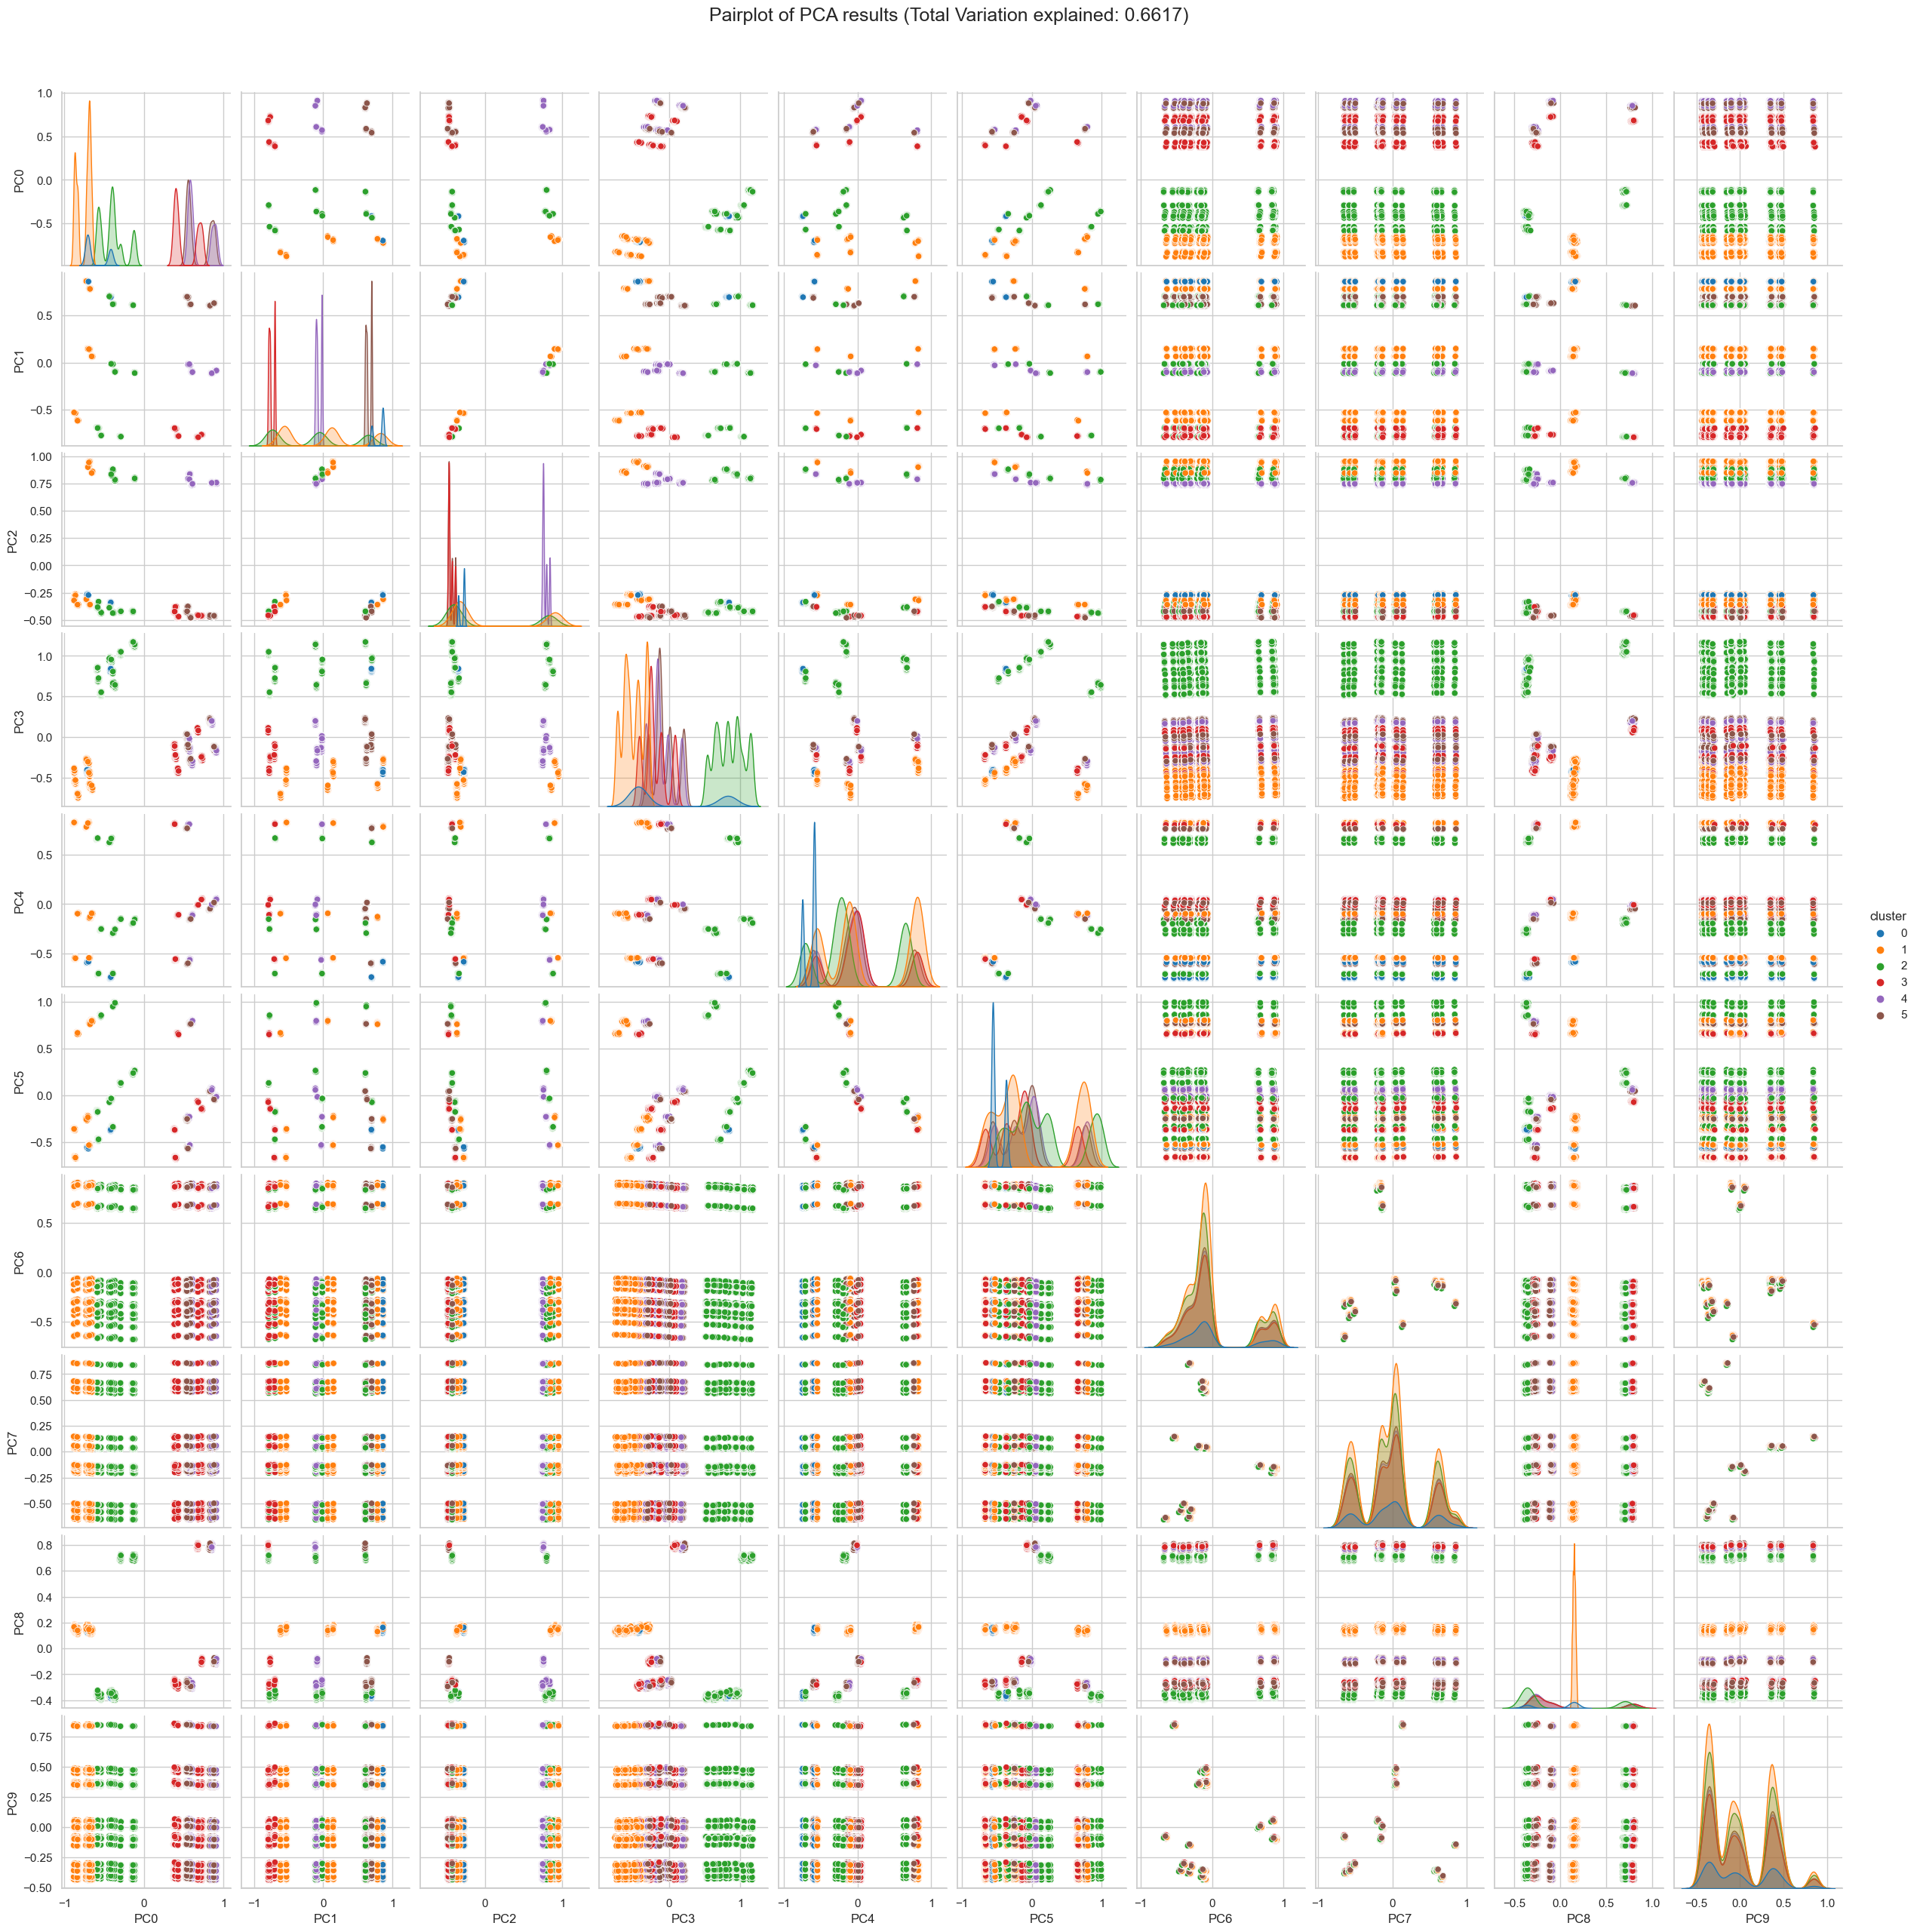

In [30]:
#plt.figure(figsize=(12, 12), dpi=128)
g = sns.pairplot(X_train_transformed, hue="cluster", palette="tab10")
g.fig.suptitle(f"Pairplot of PCA results (Total Variation explained: {sum(pca.explained_variance_ratio_):.4})", y=1.03, fontsize=18)
plt.show()

In [31]:
X_train["cluster"] = kmeans.labels_
X_train["cv_score"] = y_train["cv_score"]
X_train.head(5)

,model_DTC,model_KNC,model_LGBMC,model_LR,model_SVC,tuning_full,tuning_model,tuning_no,scoring_ACC,scoring_AUC,...,dataset_43098,dataset_43607,dataset_43890,dataset_43892,dataset_43896,dataset_43897,dataset_43900,dataset_43922,cluster,cv_score
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0.650562
27,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,1,0.749113
59,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,5,0.780917
91,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,2,0.884091
123,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0.809835


In [32]:
X_train[["cluster", "cv_score"]].groupby(["cluster"]).describe()

cv_score                                                              \
           count      mean       std       min       25%       50%       75%   
cluster                                                                        
0         1851.0  0.763915  0.178041  0.425540  0.596474  0.763400  0.944599   
1         9074.0  0.718291  0.242857  0.000000  0.580094  0.792877  0.900434   
2         7710.0  0.766680  0.204152  0.000000  0.650649  0.829639  0.916808   
3         5601.0  0.631267  0.330572  0.000000  0.391815  0.773755  0.907259   
4         5809.0  0.814103  0.139996  0.064561  0.735586  0.843478  0.926181   
5         6009.0  0.717740  0.182152  0.392005  0.534964  0.714524  0.881000   

              
         max  
cluster       
0        1.0  
1        1.0  
2        1.0  
3        1.0  
4        1.0  
5        1.0